In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import time

from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

1. Beta should be used to find correlation with market
2. find out how much more the stock will perform above market
3. pick stocks that reduce market risk and B=0
4. execute trades to maximize profits

In [2]:
def get_max_close(symbol):
    """ Return the maximum closing value fopr stock indicated by symbol.
    
    Note: Data for a stock is stored in file: data/<symbol>.csv
    
    """
    df = pd.read_csv("data/{}.csv".format(symbol))
    return df['Close'].max()

In [3]:
def get_mean_volume(symbol):
    """
    Note: Data for a stock is stored in file: data/<symbol>/csv
    """
    
    df =pd.read_csv('data/{}.csv'.format(symbol))
    return df['Volume'].mean()

In [4]:
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

In [5]:
def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    
    df = pd.DataFrame(index=dates)
    
    if "VISL" not in symbols: # add Spy for reference if absent
        symbols.insert(0,'VISL')
        
    for symbol in symbols:
        df_temp=pd.read_csv(symbol_to_path(symbol), index_col ='Date', parse_dates=True ,
                        usecols =['Date','Adj Close'], na_values=['nan'])
        
        df_temp = df_temp.rename(columns={'Adj Close':symbol})
        df = df.join(df_temp)
        if symbol =='VISL':
            df = df.dropna(subset=['VISL'])
    return df

In [6]:
def get_rolling_mean(values, window):
    """Return rolling mean of given values using specified window size."""
    return values.rolling(window).mean()

In [7]:
def get_rolling_std(values, window):
    """Return rolling standard deviation of given values,
    using specidifed window size"""
    return values.rolling(window).std()

In [8]:
def get_bollinger_bands(rm,rstd):
    """Return upper and lower Bollinger Bands"""
    upper_band = rm + rstd *2
    lower_band = rm - rstd *2
    return upper_band, lower_band

## daily returns

In [9]:
def compute_daily_returns(df):
    """Compute and return the daily return values"""
    daily_returns = df.copy() #copy given DataFrame to match size and column names
    daily_returns[1:]= (df[1:]/df[:-1].values)-1
    daily_returns.ix[0,:] = 0 
    
    return daily_returns 

In [10]:
def compute_cumulative_returns(df, t):
    cumret= (df[t]/df[0].values)-1
    return cumret

In [11]:
get_data(['CREG'],dates)

NameError: name 'dates' is not defined

In [12]:
def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range"""
    plot_data(df.iloc[start_index:end_index,columns], title ="Selected data")


def plot_data(df):
    """Plot stock prices"""
    df.iplot(kind ='spread', xTitle = 'Date', yTitle ='Price')

    plt.show

In [13]:
plot_selected(data)

NameError: name 'data' is not defined

In [14]:
data

NameError: name 'data' is not defined

In [15]:
def normalize_data (df):
    """Normalize stock prices using the first row of the dataframe"""
    return df/df.iloc[0,:]

In [16]:

ndata= normalize_data(data)

NameError: name 'data' is not defined

In [17]:
plot_data(ndata)

NameError: name 'ndata' is not defined

In [18]:
data = get_data(symbols,dates)

NameError: name 'symbols' is not defined

In [19]:
data.iplot(kind='spread')

NameError: name 'data' is not defined

In [20]:
symbols = ['VISL','OCX','CREG','DNN']

In [21]:
start_date = '2019-05-22'
end_date = '2020-02-29'
dates = pd.date_range(start_date,end_date)
df1 = pd.DataFrame(index=dates)

dfV = pd.read_csv('data/VISL.csv', index_col = "Date",
                  parse_dates=True, usecols =['Date','Adj Close'], na_values=['nan'])

dfV = dfV.rename(columns={'Adj Close':'VISL'})
df1 = df1.join(dfV, how='inner')



In [22]:
symbols = ['OCX','CREG','DNN']
for symbol in symbols:
    df_temp=pd.read_csv("data/{}.csv".format(symbol), index_col ='Date', parse_dates=True ,
                        usecols =['Date','Adj Close'], na_values=['nan'])
    
    df_temp = df_temp.rename(columns={'Adj Close':symbol})
    df1 = df1.join(df_temp, how='left')
    df1

In [23]:
df1

,VISL,OCX,CREG,DNN
2019-05-22,1.52,4.94,0.51,0.51
2019-05-23,1.57,4.79,0.48,0.50
2019-05-24,1.65,4.48,0.48,0.50
2019-05-28,1.65,4.41,0.48,0.50
2019-05-29,1.55,4.21,0.47,0.50
...,...,...,...,...
2020-02-24,0.21,2.63,0.34,0.37
2020-02-25,0.20,2.58,0.33,0.35
2020-02-26,0.18,2.52,0.32,0.35
2020-02-27,0.17,2.26,0.33,0.33


In [24]:
dates
df1

,VISL,OCX,CREG,DNN
2019-05-22,1.52,4.94,0.51,0.51
2019-05-23,1.57,4.79,0.48,0.50
2019-05-24,1.65,4.48,0.48,0.50
2019-05-28,1.65,4.41,0.48,0.50
2019-05-29,1.55,4.21,0.47,0.50
...,...,...,...,...
2020-02-24,0.21,2.63,0.34,0.37
2020-02-25,0.20,2.58,0.33,0.35
2020-02-26,0.18,2.52,0.32,0.35
2020-02-27,0.17,2.26,0.33,0.33


In [25]:
def test_run():
    """Function called by Test Run."""
    
    df = pd.read_csv('data/VISL.csv')
 
    df[['High','Close','Low']].plot()
    plt.show
    for symbol in ['VISL', 'CREG']:
        print("Print mean")
        print(symbol, get_mean_volume(symbol))
        


In [26]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Print mean
VISL 3110615.0197628457
Print mean
CREG 464640.38976377953


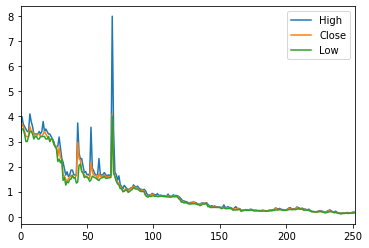

In [27]:
if __name__ == "__main__":
    test_run()

In [28]:
np.ones((5,3), dtype= int)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [29]:
np.random.random((5,4))

array([[0.02440148, 0.9216793 , 0.25823083, 0.14725359],
       [0.26186495, 0.70199826, 0.6309393 , 0.51749682],
       [0.6299026 , 0.7124517 , 0.10688815, 0.10303002],
       [0.66471144, 0.97852715, 0.70635773, 0.77590152],
       [0.94414677, 0.146837  , 0.73282589, 0.87792477]])

In [30]:
np.random.normal((5,4,30))

array([ 4.40580331,  4.1798419 , 28.95526639])

In [31]:
a = np.array([9, 6, 2, 3, 12, 14, 7, 10], dtype= np.int32)

In [32]:
a.argmax()

5

In [33]:
t1 = time.time()
print ("ML4T")
t2 = time.time()
print("time take by print statement is {time} seconds".format(time = t2-t1))

ML4T
time take by print statement is 0.0002887248992919922 seconds


In [34]:

a

array([ 9,  6,  2,  3, 12, 14,  7, 10], dtype=int32)

In [35]:
a[:4] = [1,2,3,3]

In [36]:
a

array([ 1,  2,  3,  3, 12, 14,  7, 10], dtype=int32)

In [37]:
a

array([ 1,  2,  3,  3, 12, 14,  7, 10], dtype=int32)

In [38]:
for i in range(len(a))

SyntaxError: invalid syntax (<ipython-input-38-f338ea98bfc5>, line 1)

## Bollinger Bands

In [39]:
dates = pd.date_range('2019-08-01', '2020-01-01')

In [40]:
symbols = ['VISL']
df=get_data(symbols,dates)

In [41]:
rm_VISL = get_rolling_mean(df['VISL'], window=20)

In [42]:
rstd_VISL = get_rolling_std(df['VISL'], window = 20)

In [43]:
upper_band, lower_band = get_bollinger_bands(rm_VISL, rstd_VISL)

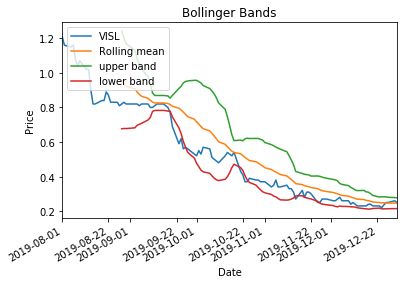

In [44]:
ax = df['VISL'].plot(title= 'Bollinger Bands', label = 'VISL')

rm_VISL.plot(label = 'Rolling mean', ax = ax)

upper_band.plot(label='upper band', ax = ax)
lower_band.plot(label= 'lower band', ax = ax)



ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

## Daily Returns

In [45]:
dates = pd.date_range('2019-09-01', '2020-02-01')
symbols= ['VISL', 'OCX']
df = get_data(symbols, dates)
plot_data(df)

In [46]:
daily_returns = compute_daily_returns(df)
plot_data(daily_returns)

/Users/kahlil/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



## forward filling for missing stock data

In [47]:
# first forward filling
pd.DataFrame.fillna(method = 'ffill', inplace = "TRUE")
# then back fill the data
pd.DataFrame.fillna(method = 'bfill', inplace = "TRUE")

TypeError: fillna() missing 1 required positional argument: 'self'

In [48]:
daily_returns

,VISL,OCX
2019-09-03,0.000000,0.000000
2019-09-04,0.000000,0.016393
2019-09-05,-0.012195,-0.069892
2019-09-06,0.012346,-0.046243
2019-09-09,0.000000,-0.036364
...,...,...
2020-01-27,0.034483,-0.035842
2020-01-28,0.233333,0.011152
2020-01-29,-0.135135,0.000000
2020-01-30,-0.062500,-0.018382


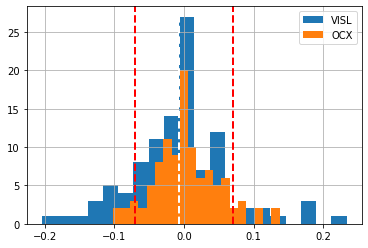

In [49]:

# plotting a histogram
daily_returns['VISL'].hist(bins=20, label = 'VISL')
daily_returns['OCX'].hist(bins=20, label= 'OCX')


# addding mean and standard deviation
mean = daily_returns['VISL'].mean()
std = daily_returns['VISL'].std()

### adding. mean and std line
plt.axvline(mean,color='w', linestyle = 'dashed', linewidth=2)
plt.axvline(std,color='r', linestyle = 'dashed', linewidth=2)
plt.axvline(-std,color='r', linestyle = 'dashed', linewidth=2)

plt.legend(loc='upper right')


 ## Caculating Kurtosis

In [50]:
daily_returns.kurtosis()

VISL    1.783216
OCX     0.561570
dtype: float64

## Scatter plot

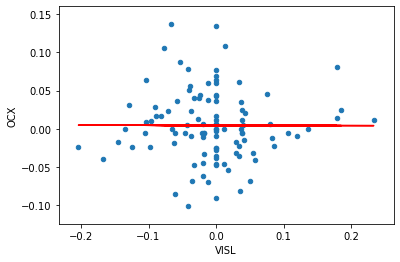

In [51]:
daily_returns.plot(kind = 'scatter', x = 'VISL', y = "OCX")

## calculating the fit line
beta_OCX ,alpha_OCX = np.polyfit(daily_returns['VISL'], daily_returns['OCX'], 1)
plt.plot(daily_returns['VISL'], beta_OCX*daily_returns['VISL']+alpha_OCX, '-', color= 'r')
plt.show()

In [52]:
daily_returns

,VISL,OCX
2019-09-03,0.000000,0.000000
2019-09-04,0.000000,0.016393
2019-09-05,-0.012195,-0.069892
2019-09-06,0.012346,-0.046243
2019-09-09,0.000000,-0.036364
...,...,...
2020-01-27,0.034483,-0.035842
2020-01-28,0.233333,0.011152
2020-01-29,-0.135135,0.000000
2020-01-30,-0.062500,-0.018382


In [53]:
#computing the sharpe ratio

(daily_returns.mean()/daily_returns.std()) *np.sqrt(255)

VISL   -1.518925
OCX     1.538540
dtype: float64

In [54]:
daily_returns.mean()* 255

VISL   -1.719747
OCX     1.124779
dtype: float64

## make an optimizer

In [55]:
### Minimize an objective function, using SciPy.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo


def f(X):
    """Given a scalar X, return some value (a real number)."""
    Y = (X-1.5)**2 + 0.5
    print ('X = {}, Y={}'.format(X,Y))
    return Y

In [56]:
Xgues = 2.0
min_result = spo.minimize(f, Xgues, method='SLSQP', options = {'disp':True})
print ('Minima found at:')
print('X={}, Y = {}'.format(min_result.x,min_result.fun))

X = [2.], Y=[0.75]
X = [2.], Y=[0.75]
X = [2.00000001], Y=[0.75000001]
X = [0.99999999], Y=[0.75000001]
X = [1.5], Y=[0.5]
X = [1.5], Y=[0.5]
X = [1.50000001], Y=[0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minima found at:
X=[1.5], Y = 0.5


## fit a line to given data points

In [57]:
def error(line,data): #error function
    """Compute error  between given line model and observed data.
    
    Parameters
    ----------
    line: tuple/list/array(C0,C1) where C0 is slope and C1 is Y-intercept
    data: 2D array where each row is a point(x,y)
    
    Returns error as a single real value.
    """
    # Metric: Sum of squared Y-axis differences
    err= np.sum((data[:,1]-(line[0]*data[:,0]+line[1]))**2)
    return err

Original line: C0 =4.0, C1=2.0


NameError: name 'fit_line' is not defined

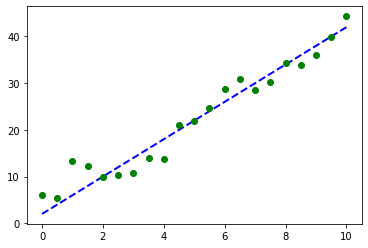

In [58]:
#Define original line
l_orig = np.float32([4,2])

print("Original line: C0 ={}, C1={}".format(l_orig[0],l_orig[1]))
Xorig = np.linspace(0,10,21)
Yorig = l_orig[0]*Xorig + l_orig[1]
plt.plot(Xorig, Yorig, 'b--', linewidth = 2.0, label = "Original line")

#Generate noisy data points
noise_sigma = 3.0
noise = np.random.normal(0, noise_sigma, Yorig.shape)
data = np.asarray([Xorig, Yorig + noise]).T
plt.plot(data[:,0], data[:,1], 'go', label = 'Data Points')

# Try to fit a line to this data
l_fit = fit_line(data,error)
print("Fitted line: C0= {}, C1={}".format(l_fit[0], l_fit[1]))
plt.plot(data[:,0],l_fit[0]* data[:,0] +l_fit[1], 'r--', linewidth = 2.0, label = 'Final guess')


In [59]:
def fit_line(data, error_func):
    """Fit a line to given data, using a supplied error function.
    
    Parameters
    ------------------
    
    data: 2D array where each row is a point(X0, Y)
    error_func: function that computes the error between a line and observed data
    
    Retrurns line that minimizes the error function.
    """
    
    #Generate initial guess for line model
    l = np.float32([0,np.mean(data[:,1])]) #slope = 0, intercept = mean(y values)
    
    # Plot initial guess(optional)
    x_ends = np.float32([-5,5])
    plt.plot(x_ends, l[0]* x_ends + l[1], 'm--', linewidth=2.0, label ="Initial guess")
    
    # Call optimizer to minimize error function
    result = spo.minimize(error_func, l, args =(data,),
                          method = 'SLSQP', options ={'disp': True})
    return result.x

## fitting to a polynomial

In [60]:
def error_poly(C, data):
    """ Compute error between given polynomial and observed data.
    
    Parameters
    ----------
    C: numpy.poly1d object or equivalent array representing polynomial coefficients
    data:2D array where each row is a point(x,y)
    
    
    Returns error as a single real value.
    """
    
    # Metric: Sum of squared Y-axis differences
    err = np.sum((data[:,1]-np.polyval((C,data[:,0])))**2)
    
    return err


In [61]:
def fit_poly(data, error_func, degree=3):
    """Fit a polynomial to given data, using supplied error function.
    
    
    Parameters
    ----------
    data: 2D array where each row is a point (x,y)
    error_func: function that computes the error between a polynomial and observed data point
    
    Returns polynomial that minimizes the error function.
    """
    
    # Generate initial guess for polynomial model(all coeffs =1)
    
    Cguess = np.poly1d(np.ones(degree+1, dtype=np.float32))
    
    # Plot initial guess(optional)
    
    x = np.linspace(-5,5,21)
    plt.plot(x, np.polyval((guess,x), 'm--', linewidth = 2.0, label="Initial guess"))
    
    # Call optimizer to minimize error function
    result = spo.minimize(error_func, Cguess, args=(data,), method='SLSQP', options={'disp':True})
    return np.poly1d(result.x) # convert optimal result into a poly1d object and res